In [1]:
library(devtools)
library(arules)
library(RColorBrewer)

Loading required package: usethis

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




In [2]:
# Đọc và chuẩn hóa dữ liệu
data <- read.csv('Dataset/ItemList.csv', header = TRUE)
head(data)

,itemList,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,sausage,whole milk,semi-finished bread,yogurt,,,,,,,
2,whole milk,pastry,salty snack,,,,,,,,
3,canned beer,misc. beverages,,,,,,,,,
4,sausage,hygiene articles,,,,,,,,,
5,soda,pickled vegetables,,,,,,,,,
6,frankfurter,curd,,,,,,,,,


In [3]:
tr1 <- read.transactions('Dataset/ItemList.csv', format = 'basket', sep =',', rm.duplicates= TRUE, header = TRUE)

distribution of transactions with duplicates:
items
  1   2   3   4 
662  39   5   1 


In [4]:
inspect(tr1[1:5])

    items                                             
[1] {sausage, semi-finished bread, whole milk, yogurt}
[2] {pastry, salty snack, whole milk}                 
[3] {canned beer, misc. beverages}                    
[4] {hygiene articles, sausage}                       
[5] {pickled vegetables, soda}                        


In [5]:
itemLabels(tr1)

[1] "abrasive cleaner"          "artif. sweetener"         
  [3] "baby cosmetics"            "bags"                     
  [5] "baking powder"             "bathroom cleaner"         
  [7] "beef"                      "berries"                  
  [9] "beverages"                 "bottled beer"             
 [11] "bottled water"             "brandy"                   
 [13] "brown bread"               "butter"                   
 [15] "butter milk"               "cake bar"                 
 [17] "candles"                   "candy"                    
 [19] "canned beer"               "canned fish"              
 [21] "canned fruit"              "canned vegetables"        
 [23] "cat food"                  "cereals"                  
 [25] "chewing gum"               "chicken"                  
 [27] "chocolate"                 "chocolate marshmallow"    
 [29] "citrus fruit"              "cleaner"                  
 [31] "cling film/bags"           "cocoa drinks"             
 [33] "coffee"                    "condensed milk"           
 [35] "cooking chocolate"         "cookware"                 
 [37] "cream"                     "cream cheese"             
 [39] "curd"                      "curd cheese"              
 [41] "decalcifier"               "dental care"              
 [43] "dessert"                   "detergent"                
 [45] "dish cleaner"              "dishes"                   
 [47] "dog food"                  "domestic eggs"            
 [49] "female sanitary products"  "finished products"        
 [51] "fish"                      "flour"                    
 [53] "flower (seeds)"            "flower soil/fertilizer"   
 [55] "frankfurter"               "frozen chicken"           
 [57] "frozen dessert"            "frozen fish"              
 [59] "frozen fruits"             "frozen meals"             
 [61] "frozen potato products"    "frozen vegetables"        
 [63] "fruit/vegetable juice"     "grapes"                   
 [65] "hair spray"                "ham"                      
 [67] "hamburger meat"            "hard cheese"              
 [69] "herbs"                     "honey"                    
 [71] "house keeping products"    "hygiene articles"         
 [73] "ice cream"                 "instant coffee"           
 [75] "Instant food products"     "jam"                      
 [77] "ketchup"                   "kitchen towels"           
 [79] "kitchen utensil"           "light bulbs"              
 [81] "liqueur"                   "liquor"                   
 [83] "liquor (appetizer)"        "liver loaf"               
 [85] "long life bakery product"  "make up remover"          
 [87] "male cosmetics"            "margarine"                
 [89] "mayonnaise"                "meat"                     
 [91] "meat spreads"              "misc. beverages"          
 [93] "mustard"                   "napkins"                  
 [95] "newspapers"                "nut snack"                
 [97] "nuts/prunes"               "oil"                      
 [99] "onions"                    "organic products"         
[101] "organic sausage"           "other vegetables"         
[103] "packaged fruit/vegetables" "pasta"                    
[105] "pastry"                    "pet care"                 
[107] "photo/film"                "pickled vegetables"       
[109] "pip fruit"                 "popcorn"                  
[111] "pork"                      "pot plants"               
[113] "potato products"           "preservation products"    
[115] "processed cheese"          "prosecco"                 
[117] "pudding powder"            "ready soups"              
[119] "red/blush wine"            "rice"                     
[121] "roll products"             "rolls/buns"               
[123] "root vegetables"           "rubbing alcohol"          
[125] "rum"                       "salad dressing"           
[127] "salt"                      "salty snack"              
[129] "sauces"                    

In [6]:
nrow(data)

[1] 14963

In [7]:
# apriori() function
rules <- apriori(tr1, parameter = list(supp = 0.0003, conf = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   3e-04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[167 item(s), 14963 transaction(s)] done [0.00s].
sorting and recoding items ... [163 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [146 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [8]:
inspect(rules[1:10])

     lhs                         rhs          support      confidence
[1]  {syrup}                  => {whole milk} 0.0004009891 0.2857143 
[2]  {canned fruit}           => {whole milk} 0.0004009891 0.2857143 
[3]  {light bulbs}            => {whole milk} 0.0004678206 0.2413793 
[4]  {artif. sweetener}       => {soda}       0.0004678206 0.2413793 
[5]  {artif. sweetener}       => {whole milk} 0.0005346521 0.2758621 
[6]  {brandy}                 => {whole milk} 0.0008688097 0.3421053 
[7]  {spices}                 => {soda}       0.0006014837 0.2250000 
[8]  {softener}               => {whole milk} 0.0008019782 0.2926829 
[9]  {house keeping products} => {whole milk} 0.0007351467 0.2444444 
[10] {finished products}      => {whole milk} 0.0008688097 0.2031250 
     coverage    lift     count
[1]  0.001403462 1.809201  6   
[2]  0.001403462 1.809201  6   
[3]  0.001938114 1.528463  7   
[4]  0.001938114 2.485725  7   
[5]  0.001938114 1.746815  8   
[6]  0.002539598 2.166281 13   
[7]  0

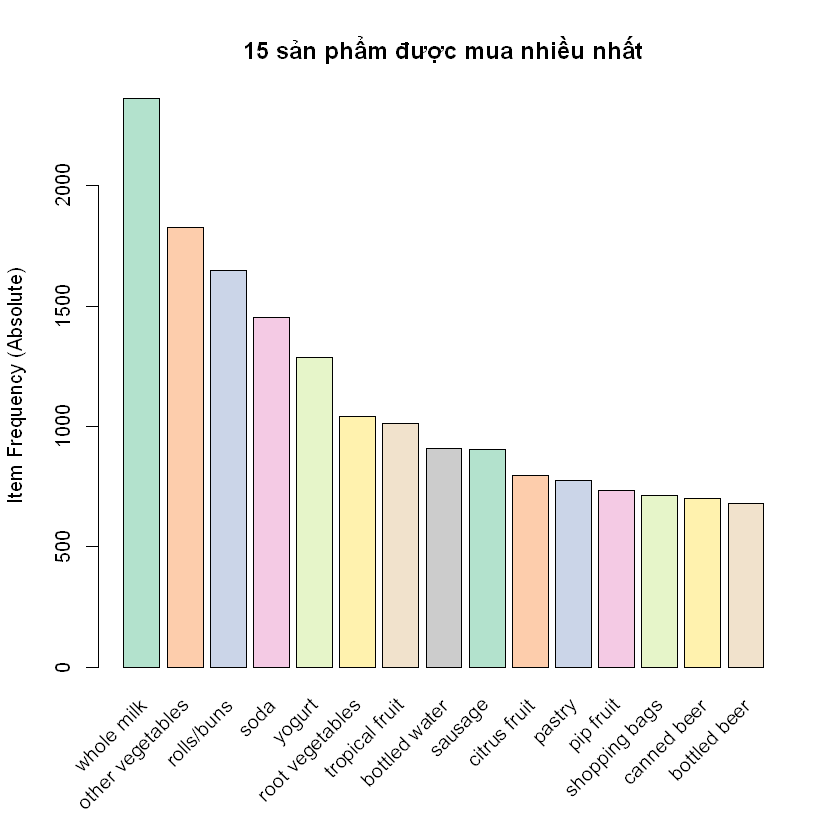

In [9]:
# itemFrequencyPlot() function
arules::itemFrequencyPlot(tr1, topN = 15, 
                          col = brewer.pal(8, 'Pastel2'),
                          main = '15 sản phẩm được mua nhiều nhất',
                          type = "absolute",
                          ylab = "Item Frequency (Absolute)")

In [10]:
sausage_rules_lhs <- subset(rules, subset = lhs %pin% 'sausage')
summary(sausage_rules_lhs)

set of 25 rules

rule length distribution (lhs + rhs):sizes
 3  4 
22  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    3.00    3.00    3.12    3.00    4.00 

summary of quality measures:
    support            confidence        coverage              lift      
 Min.   :0.0003342   Min.   :0.2069   Min.   :0.0006015   Min.   :1.310  
 1st Qu.:0.0003342   1st Qu.:0.2222   1st Qu.:0.0014035   1st Qu.:1.620  
 Median :0.0004010   Median :0.2414   Median :0.0015371   Median :2.288  
 Mean   :0.0004758   Mean   :0.2746   Mean   :0.0018793   Mean   :2.470  
 3rd Qu.:0.0004010   3rd Qu.:0.2727   3rd Qu.:0.0019381   3rd Qu.:3.038  
 Max.   :0.0014703   Max.   :0.5556   Max.   :0.0057475   Max.   :4.833  
     count      
 Min.   : 5.00  
 1st Qu.: 5.00  
 Median : 6.00  
 Mean   : 7.12  
 3rd Qu.: 6.00  
 Max.   :22.00  

mining info:
 data ntransactions support confidence
  tr1         14963   3e-04        0.2
                                                            call
 ap

In [11]:
inspect(sausage_rules_lhs[1:10])

     lhs                       rhs                support      confidence
[1]  {hard cheese, sausage} => {other vegetables} 0.0003341576 0.4545455 
[2]  {beverages, sausage}   => {whole milk}       0.0003341576 0.2173913 
[3]  {sausage, waffles}     => {other vegetables} 0.0003341576 0.4166667 
[4]  {dessert, sausage}     => {whole milk}       0.0004009891 0.2727273 
[5]  {chocolate, sausage}   => {whole milk}       0.0003341576 0.2380952 
[6]  {sausage, white bread} => {other vegetables} 0.0003341576 0.2380952 
[7]  {coffee, sausage}      => {pastry}           0.0003341576 0.2500000 
[8]  {margarine, sausage}   => {yogurt}           0.0004009891 0.2142857 
[9]  {butter, sausage}      => {whole milk}       0.0004009891 0.2068966 
[10] {pork, sausage}        => {yogurt}           0.0004009891 0.2608696 
     coverage     lift     count
[1]  0.0007351467 3.722695 5    
[2]  0.0015371249 1.376566 5    
[3]  0.0008019782 3.412470 5    
[4]  0.0014702934 1.726965 6    
[5]  0.0014034619 1.5

- Nếu mua sausage thì được gợi ý mua other vegetable, whole milk,...